In [1]:
from parse_data import SetParser, RowParser, DecisionStats
import dill
import pandas as pd

dill.settings['recurse'] = True

NUM_DRAFTS_CHUNKSIZE = 10000
SET_INFO = [
    {
        'set_name': 'FDN',
        'draft_results_file': '~/Downloads/draft_data_public.FDN.PremierDraft.csv',
        'card_values_file': '~/Downloads/fdn_card-ratings-2025-01-16.csv',
        'num_cards_in_pack': 14,
    },
    {
        'set_name': 'DSK',
        'draft_results_file': '~/Downloads/draft_data_public.DSK.PremierDraft.csv',
        'card_values_file': '~/Downloads/dsk_card-ratings-2025-01-16.csv',
        'num_cards_in_pack': 14,
    },
    {
        'set_name': 'PIO',
        'draft_results_file': '~/Downloads/draft_data_public.PIO.PremierDraft.csv',
        'card_values_file': '~/Downloads/pio_card-ratings-2025-01-26.csv',
        'num_cards_in_pack': 15,
    },
]

In [ ]:
for set_info in SET_INFO:
    SetParser(**set_info).parse_set(chunksize=NUM_DRAFTS_CHUNKSIZE * set_info['num_cards_in_pack'])

In [ ]:
import os
from parse_data import METRICS

for set_info in SET_INFO:
    sp = SetParser(**set_info)
    for file in [
        os.path.join(dirpath, f)
        for (dirpath, _, filenames) in os.walk(f'/Users/awooddoughty/Documents/mtg/{set_info["set_name"]}/row_data')
        for f in filenames
    ]:
        data = pd.read_parquet(file)
        final_data = sp.gen_decision_stats(data=data)
        final_data.to_parquet(file.replace('row_data', 'final_data'))
        print(file)

In [6]:
# df = pd.read_parquet('/Users/awooddoughty/Documents/mtg/FDN/final_data')
df = pd.concat([
    pd.read_parquet('/Users/awooddoughty/Documents/mtg/FDN/final_data').assign(set_name='FDN'),
    pd.read_parquet('/Users/awooddoughty/Documents/mtg/DSK/final_data').assign(set_name='DSK'),
    pd.read_parquet('/Users/awooddoughty/Documents/mtg/PIO/final_data').assign(set_name='PIO'),
])

In [7]:
plot_df = df.loc[
    lambda x: (x['pick_number'].between(4, 10)) & (x['best_option_in_colors'].notnull())
].fillna(value={'rank': 'unknown'})
plot_df

,draft_id,rank,event_match_wins,pack_number,pick_number,pick_maindeck_rate,user_n_games_bucket,user_game_win_rate_bucket,final_pool_alsa_normalized,final_pool_alsa_normalized_squared,...,best_option_in_colors,current_pool_second_color,open_lane_second_color,best_option_in_other,open_lane_in_other,other_color,switch,delta_card_value,delta_open_lane,set_name
0,f4060a8ab54f4a02b0916f3b0d984141,unknown,0,1,7,1.0,100,0.54,15.273936,7.875251,...,0.255347,0.568500,1.002838,0.080228,1.501266,B,0,-0.175120,0.498428,FDN
1,f4060a8ab54f4a02b0916f3b0d984141,unknown,0,1,8,0.5,100,0.54,15.273936,7.875251,...,0.000000,0.651769,1.002838,0.417673,1.918940,B,0,0.417673,0.916101,FDN
2,f4060a8ab54f4a02b0916f3b0d984141,unknown,0,1,8,0.5,100,0.54,15.273936,7.875251,...,0.000000,0.651769,1.002838,0.101009,1.484274,W,0,0.101009,0.481436,FDN
3,f4060a8ab54f4a02b0916f3b0d984141,unknown,0,1,8,0.5,100,0.54,15.273936,7.875251,...,0.000000,0.651769,1.002838,0.294364,1.419504,G,0,0.294364,0.416665,FDN
4,f4060a8ab54f4a02b0916f3b0d984141,unknown,0,1,9,1.0,100,0.54,15.273936,7.875251,...,0.215385,0.651769,1.218223,0.536868,2.455808,B,0,0.321483,1.237585,FDN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174404,17068a0f5ff24b05bcf36e05ffc2cdac,bronze,4,3,9,1.0,10,0.56,20.716934,12.081087,...,0.116391,3.323919,1.900601,0.631720,1.971930,W,0,0.515329,0.071330,PIO
4174405,17068a0f5ff24b05bcf36e05ffc2cdac,bronze,4,3,9,1.0,10,0.56,20.716934,12.081087,...,0.116391,3.323919,1.900601,0.214865,1.306907,U,0,0.098473,-0.593693,PIO
4174406,17068a0f5ff24b05bcf36e05ffc2cdac,bronze,4,3,10,1.0,10,0.56,20.716934,12.081087,...,0.194733,3.440311,2.095334,0.118084,2.090015,W,0,-0.076649,-0.005319,PIO
4174407,17068a0f5ff24b05bcf36e05ffc2cdac,bronze,4,3,10,1.0,10,0.56,20.716934,12.081087,...,0.194733,3.440311,2.095334,0.031683,1.338590,U,0,-0.163050,-0.756743,PIO


array([[<Axes: title={'center': 'delta_card_value'}>,
        <Axes: title={'center': 'delta_open_lane'}>]], dtype=object)

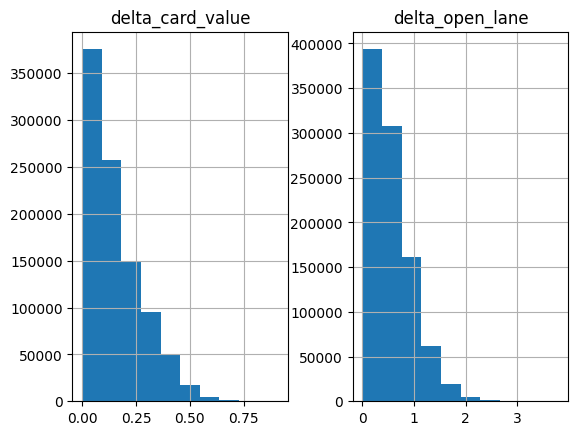

In [25]:
plot_df_slice[['delta_card_value', 'delta_open_lane']].hist()

/Users/awooddoughty/mambaforge/envs/py310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
/Users/awooddoughty/mambaforge/envs/py310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
/Users/awooddoughty/mambaforge/envs/py310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
/Users/awooddoughty/mambaforge/envs/py310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
/Users/awooddoughty/mambaforge/envs/py310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
/Users/awooddoughty/mambaforge/envs/py310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
/Users/awooddoughty/mambaforge/envs/py310/lib/python3.10/site-packages/pandas/core/array

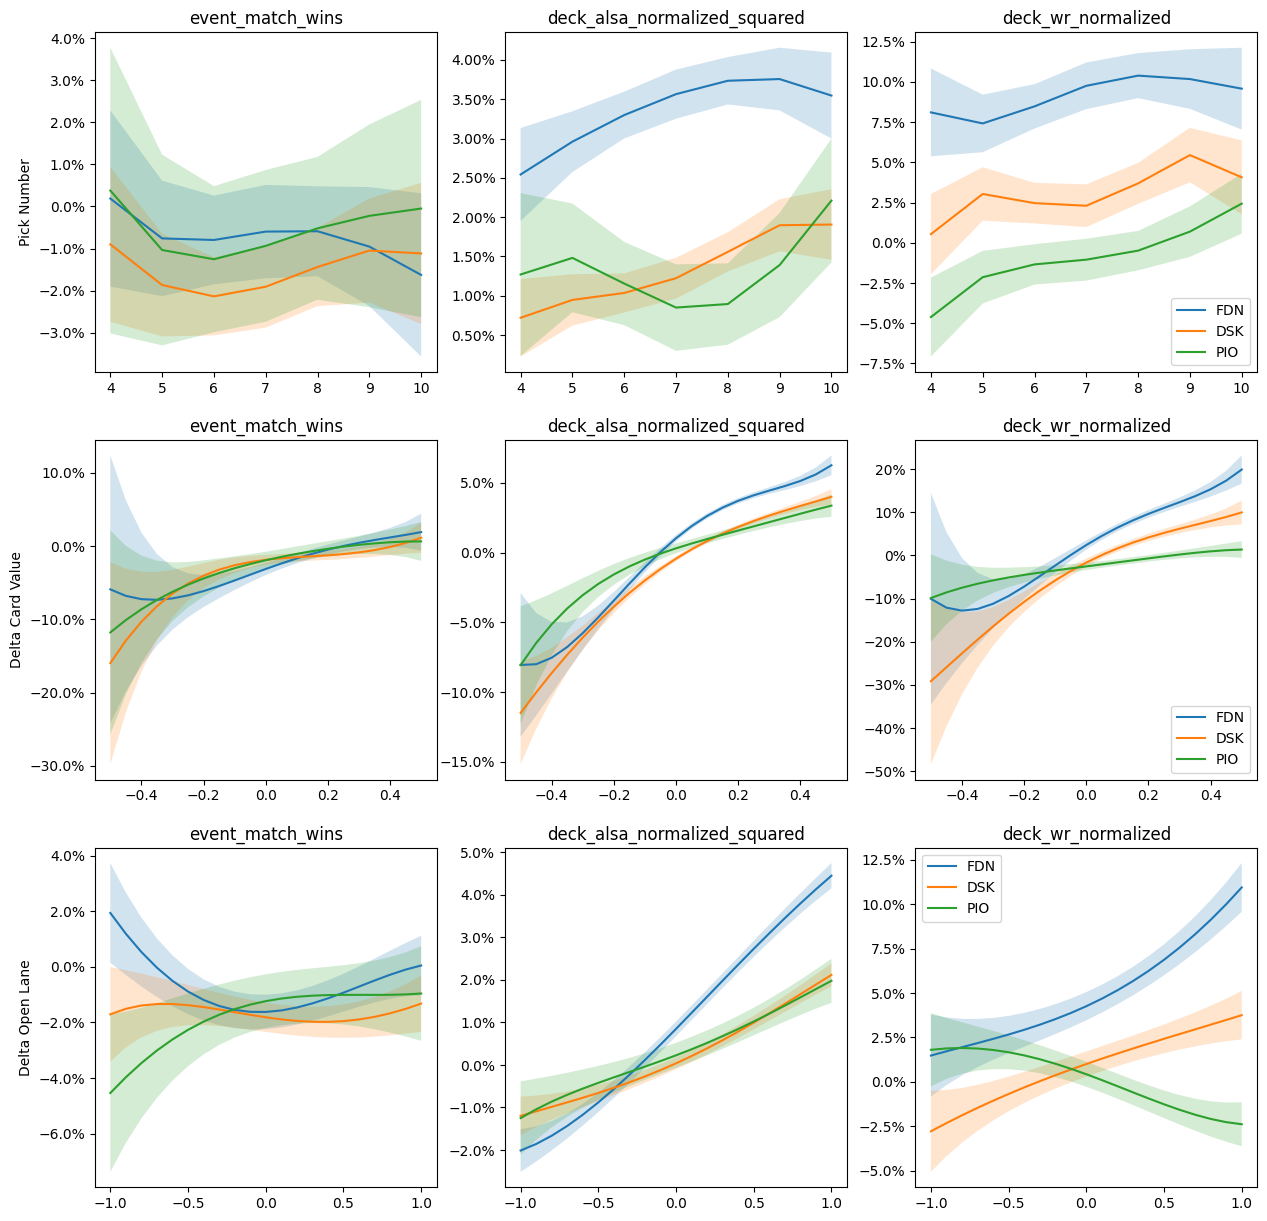

In [26]:
from marginaleffects import comparisons, datagrid
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

OUTCOMES = ['event_match_wins', 'deck_alsa_normalized_squared', 'deck_wr_normalized']
CATEGORICAL_VARS = ['rank', 'pack_number']
user_controls = 'C(rank) + user_n_games_bucket + user_game_win_rate_bucket'
decision_controls = 'pick_number + current_pool_second_color + delta_card_value + delta_open_lane'

plot_df_slice = plot_df.loc[lambda x: (x['pack_number'] == 1) & (x['delta_open_lane'] > 0) & (x['delta_card_value'] > 0)]


def create_poly_func(variable):
    return f'{variable} + np.power({variable}, 2) + np.power({variable}, 3)'


RES_PARAMS = [
    {
        'title': 'Pick Number',
        'x': 'pick_number',
        'data': plot_df.loc[lambda x: (x['pack_number'] == 1) & (x['delta_open_lane'] > 0) & (x['delta_card_value'] > 0)],
        'formula_rhs': f'{user_controls} + switch*({create_poly_func("pick_number")})*({decision_controls})',
        'datagrid_params': {
            'pick_number': plot_df['pick_number'].unique(),
            **{
                cat_var: plot_df[cat_var].unique()
                for cat_var in CATEGORICAL_VARS
            },
        },
    },
    {
        'title': 'Delta Card Value',
        'x': 'delta_card_value',
        'data': plot_df.loc[lambda x: (x['pack_number'] == 1) & (x['delta_open_lane'] > 0)],
        'formula_rhs': f'{user_controls} + switch*({create_poly_func("delta_card_value")})*({decision_controls})',
        'datagrid_params': {
            'delta_card_value': np.linspace(-0.5, 0.5, 21),
            **{
                cat_var: plot_df[cat_var].unique()
                for cat_var in CATEGORICAL_VARS
            },
        },
    },
    {
        'title': 'Delta Open Lane',
        'x': 'delta_open_lane',
        'data': plot_df.loc[lambda x: (x['pack_number'] == 1) & (x['delta_card_value'] > 0)],
        'formula_rhs': f'{user_controls} + switch*({create_poly_func("delta_open_lane")})*({decision_controls})',
        'datagrid_params': {
            'delta_open_lane': np.linspace(-1, 1, 21),
            **{
                cat_var: plot_df[cat_var].unique()
                for cat_var in CATEGORICAL_VARS
            },
        },
    },
]

def create_plot_data():
    fig, ax = plt.subplots(len(RES_PARAMS), len(OUTCOMES), figsize=(5 * len(OUTCOMES), 5 * len(RES_PARAMS)), squeeze=False)
    for i, params in enumerate(RES_PARAMS):
        for j, outcome in enumerate(OUTCOMES):
            for set_name in df['set_name'].unique():
                res = smf.ols(f"np.log1p({outcome}) ~ {params['formula_rhs']}", data=params['data'].loc[lambda x: x['set_name'] == set_name]).fit()
                dg = datagrid(
                    model=res,
                    grid_type='mean_or_mode',
                    switch=[0, 1],
                    **params['datagrid_params'],
                )
                if params.get('hue'):
                    results = comparisons(res, variables='switch', by=[params['x'], params['hue']], newdata=dg).to_pandas()
                    for hue_value, group in results.groupby(params['hue']):
                        ax[i, j].plot(group[params['x']], group['estimate'], label=f'{params["hue"]} {hue_value}')
                        ax[i, j].fill_between(group[params['x']], group['conf_low'], group['conf_high'], alpha=0.2)
                else:
                    results = comparisons(res, variables='switch', by=params['x'], newdata=dg).to_pandas()
                    ax[i, j].plot(results[params['x']], results['estimate'], label=f'{set_name}')
                    ax[i, j].fill_between(results[params['x']], results['conf_low'], results['conf_high'], alpha=0.2)
            ax[i, j].set_title(outcome)
            ax[i, j].yaxis.set_major_formatter(PercentFormatter(1))
        ax[i, -1].legend()
        ax[i, 0].set_ylabel(params['title'])

create_plot_data()